# <span style="color:#BC48CD"> Numerical Simulation Laboratory (NSL) - Esercitazione 2</span>
#### <span style="color:#9C19ED">Author: </span>    Alessia Sambruna <span style="color:#9C19ED">Student number: </span>     942397



In [26]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Esercizio 1
Calcolare il seguente integrale 1D via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. Tramite un campionamento da una distribuzione uniforme su $[0,1]$
2. Usando l'importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Mostrare un grafico di entrambe le stime di $I$</span> e delle rispettive incertezze per un largo numero di *throws* $M$ (e.g. $M\ge 10^4$) in funzione del numero di blocchi $N$</font>.

## Soluzione Esercizio 1 

### Metodo della media  

Il metodo si basa sulla generazione di un numero $n$ di punti secondo una distribuzione uniforme. Per ciascuno di questi punti estratti si valuta il valore che l'integranda f(x) assume, quindi si sommano i valori di f(x). 
La stima dell'integrale sarà quindi data da 
$$I = \frac{sum\cdot(x_{max} - x_{min})}{n}$$

Riportiamo di seguito un grafico dell'andamento della stima dell'integrale, ottenuto utilizzando il metodo della media a blocchi  

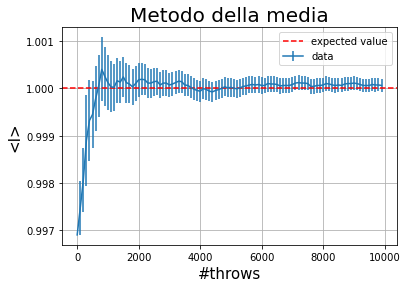

In [27]:
x, f, err = np.loadtxt("exercise_2.1/Integral_MC_mean.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.title("Metodo della media", fontsize = 20)
plt.errorbar(x,f, yerr = err, label = "data")
plt.axhline(1, color = 'red', linestyle = 'dashed', label = "expected value")
plt.xlabel('#throws', fontsize = 15)
plt.ylabel('<I>', fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

### Metodo dell'Importance Sampling 

Quando si utilizza il metodo di integrazione dell'importance sampling si parte da un integrale scritto nella forma: 
$$\int g(x)p(x)dx$$
dove $p(x)$ è una densita di probabilità. 
Si può introdurre una distribuzione di probabilità differente $d(x)$ e riscrivere l'integrale 
$$\int \frac{g(x)p(x)}{d(x)}d(x)dx$$

Un metodo MonteCarlo per il calcolo dell'integrale è dato da 
$$I = \frac{1}{N}\sum_i^N \frac{g(x)p(x)}{d(x)} $$

Si valuta che la minore discrepanza si ottiene stimando $d(x) = p(x)g(x)$ per cui la stima 

$$I = \frac{1}{N}\sum_i^N \frac{g(x)p(x)}{p(x)g(x)} = I $$

Per scegliere la distribuzione di probabilità adeguata, cerchiamo una funzione che approssimi al meglio l'integranda, ma che sia semplice da implementare. 



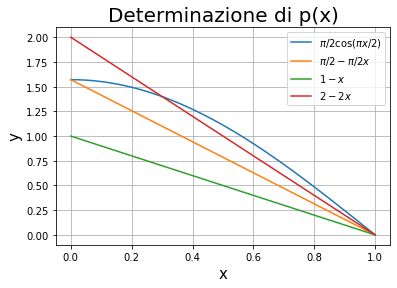

In [33]:
x = np.linspace(0, 1,100)
cos = np.pi*np.cos(x*np.pi/2)/2
p1 =(-x*np.pi/2. +np.pi/2.)
p2 =(-x +1)
p3 =(-2*x + 2)
plt.title("Determinazione di p(x)", fontsize = 20)
plt.plot(x,cos, label = '${\pi}/{2}\cos(\pi x/2)$')
plt.plot(x,p1, label = "${\pi}/{2} - {\pi}/{2} x $")
plt.plot(x,p2, label = "$1 - x $")
plt.plot(x,p3, label = "$ 2 - 2x $")


plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.legend()
plt.grid(True)


La funzione più adeguata sembra essere 
$$p(x) = 2(1-x) $$
ottenuto normalizzando la funzione $(1-x)$

Quindi prendendo in considerazione l'integrale 

$$\int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = \\
 \int_0^1 \frac{\pi}{2}\cos(\pi x/2)\frac{p(x)}{p(x)} dx = 
$$

Estriamo quindi valori di x distribuiti come p(x) e quindi stimiamo 
f(x)/p(x)

Riportiamo l'andamento della media a blocchi per i due metodi  

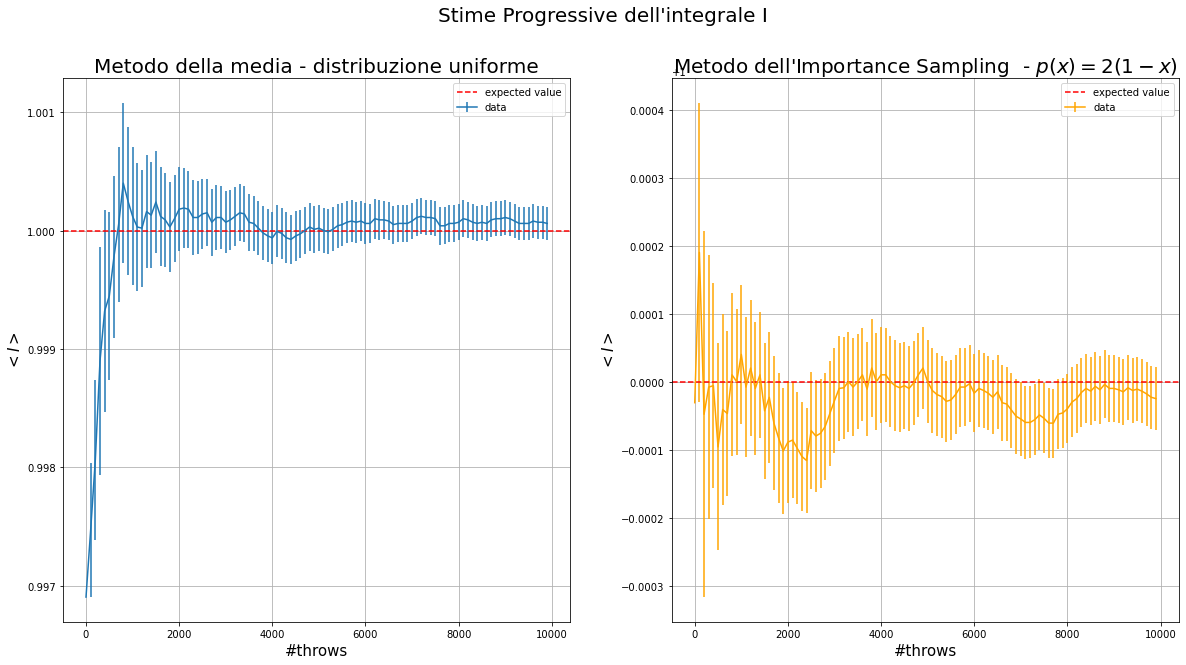

In [29]:
# Integral evaluation_ Importance Sampling method
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

fig.suptitle("Stime Progressive dell'integrale I", fontsize = 20)

x1, f1, err1 = np.loadtxt("exercise_2.1/Integral_MC_mean.dat", usecols=(0,1,2), unpack='true')
ax1.set_title("Metodo della media - distribuzione uniforme", fontsize = 20)
ax1.errorbar(x1,f1, yerr = err1, label = "data")
ax1.axhline(1., color = 'red', linestyle = 'dashed', label = "expected value")
ax1.set_xlabel('#throws', fontsize = 15)
ax1.set_ylabel('$<I>$', fontsize = 15)
ax1.legend()
ax1.grid(True)


x2, f2, err2 = np.loadtxt("exercise_2.1/Integral_MC_IS.dat", usecols=(0,1, 2), unpack='true')
ax2.set_title("Metodo dell'Importance Sampling  - $p(x) = 2(1-x)$", fontsize = 20)
ax2.errorbar(x2,f2, yerr = err2, color = "orange", label = "data")
ax2.axhline(1., color = 'red', linestyle = 'dashed', label = "expected value")
ax2.set_xlabel('#throws', fontsize = 15)
ax2.set_ylabel('$<I>$', fontsize = 15)
ax2.legend()
ax2.grid(True)


Confrontiamo i due metodi 

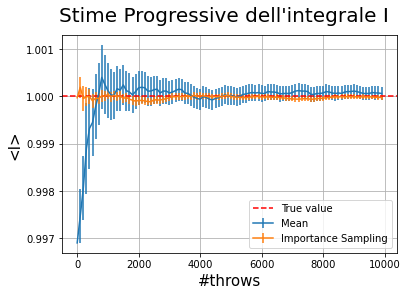

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x1, f1, err1 = np.loadtxt("exercise_2.1/Integral_MC_mean.dat", usecols=(0,1,2), unpack='true')
x2, f2, err2 = np.loadtxt("exercise_2.1/Integral_MC_IS.dat", usecols=(0,1, 2), unpack='true')

plt.suptitle("Stime Progressive dell'integrale I", fontsize = 20)
plt.errorbar(x1,f1, yerr = err1, label = "Mean")
plt.errorbar(x2,f2, yerr = err2, label = "Importance Sampling")
plt.axhline(1., color = 'red', linestyle = 'dashed', label = "True value")
plt.xlabel('#throws', fontsize = 15)
plt.ylabel('<I>', fontsize = 15)
plt.legend(loc="lower right")
plt.grid(True)



Come atteso usando il metodo dell'importance Sampling si arriva alla soluzione più velocemente e a parità di lanci, l'incertezza è minore nel caso dell'importance sampling. 
Il motivo è che scegliendo una sitribuzione di probabilità adeguata, si estraggono con maggiore probabilità quei valori che contribuiscono maggiormente alla stima dell'integrale. 

# Esercizio 2 - Random Walks (RW)
Ripetere numerose volte (M $\sim 10^4$) la simulazione del random walk 3D partendo dall'origine: 
1. *Su un reticolo cubico* con passo costante $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. *Su un reticolo continuo*: ad ogni istante si procede con un passo di lunghezza $a(=1)$ verso una direzione random estraendo uniformemente gli angoli $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$
##### Mostrare un grafico dell'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ per entrambi i RWs, con la loro incertezza statistica, in funzione del numero di passi $i\in [0,10^2]$.

## Soluzione Esercizio 2 

### Descrizione del codice 

Il codice è strutturato come segue:
E' stata creata una classe - `Position` avente come argomenti le posizioni $x,y,z$. Sono stati creati due metodi per eseguire un singolo step, `discrete_step`, che aggiorna la posizione (x, y, z) eseguendo uno step di lunghezza l = 1 in direzione x, o y o z, avanzando o arretrando di posizione, e `continuous_step` che aggiorna la posizione avanzando di uno step di l = 1 in una direzione casuale, estratta estraendo i due angoli polare e azimutale.
Il metodo `Distance` valuta la distanza tra un punto passato come argomento e il punto stesso di cui si sta richiamando l'argomento. 

La simulazione vera e propria viene eseguita tramite il metodo `get_RW_distance`: 
- si esegue un numero $n_{step} = 1000$ di passi, cioè ad ogni step si riaggionano le coordinate del punto. 
- Giunti alla fine del RW, viene calcolata la distanza tra il punto e l'origine. 

I valori delle distanze e dei passi corrispondenti sono quindi salvati su un file tramite il metodo `Results_output`, all'interno del quale viene inoltre eseguita la media a blcchi. 
Fissato un numero di step, è stata ripetuta la stima della distanza un numero $M = 10000$ di volte, quindi i valori sono stati divisi in $N=100$ blocchi e sono stati utilizzati questi valori per eseguire una media a blocchi e stimare l'incertezza sul valore di distanza trovato. 

### Descrizione dei risultati 

#### Cammino a passo discreto

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x_s, y_s, z_s = np.loadtxt("exercise_2.2/Discrete_RW.dat", usecols=(0,1, 2), unpack='true')
x_c, y_c, z_c = np.loadtxt("exercise_2.2/Continuous_RW.dat", usecols=(0,1, 2), unpack='true')


Text(0.5, 0, 'z [a.u.]')

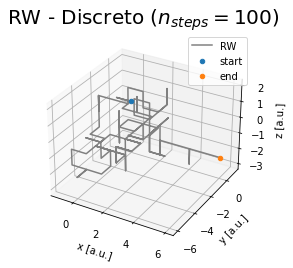

In [35]:
# example of RW 

ax1 = plt.axes(projection='3d')
ax1.set_title("RW - Discreto ($n_{steps} = 100$)", fontsize = 20)
ax1.plot3D(x_s, y_s, z_s, 'gray', label = "RW")
ax1.scatter3D (0, 0, 0, 'blue', label = "start")
ax1.scatter3D (x_s[-1], y_s[-1], z_s[-1], label = "end")
ax1.legend()
ax1.set_xlabel("x [a.u.]")
ax1.set_ylabel("y [a.u.]")
ax1.set_zlabel("z [a.u.]")

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [18]:
def f(x, k):
    return k*np.sqrt(x)

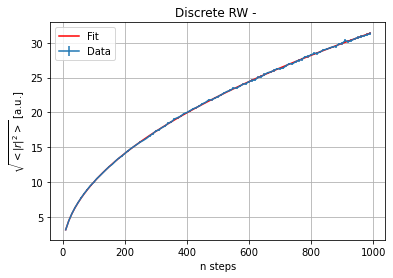

In [19]:
# Discrete Random Walk 
xdata, ydata , err = np.loadtxt("exercise_2.2/Discrete_RW_distance_nstep.dat", usecols=(0,1, 2), unpack='true')
popt = curve_fit(f, xdata, ydata)
plt.title("Discrete RW - ")
plt.errorbar(xdata,ydata,yerr = err, label = "Data")
plt.plot(xdata, f(xdata, popt[0]), 'r-', label = "Fit" )
plt.xlabel('n steps')
plt.ylabel('$\sqrt{<|r|^2>}$ [a.u.]')
plt.legend()
plt.grid(True)

plt.show()

L'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ segue $k\sqrt(N)$ dove N è il numero di step su cui è stata fatta la stima e dove k è stato valutato

In [20]:
print("k = " + str(popt[0]))

k = [0.99685561]


#### Cammino a passo continuo 

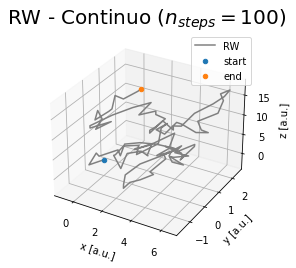

In [36]:
# example of RW 

ax2= plt.axes(projection='3d')
ax2.set_title("RW - Continuo ($n_{steps} = 100$)", fontsize = 20)
ax2.plot3D(x_c, y_c, z_c, 'gray', label = "RW")
ax2.scatter3D (0, 0, 0, 'blue', label = "start")
ax2.scatter3D (x_c[-1], y_c[-1], z_c[-1], label = "end")
ax2.set_xlabel("x [a.u.]")
ax2.set_ylabel("y [a.u.]")
ax2.set_zlabel("z [a.u.]")
ax2.legend()

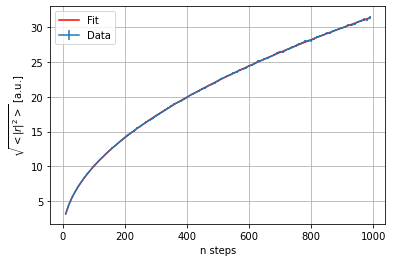

In [25]:
# continuous Random Walk 
xdata, ydata , err = np.loadtxt("exercise_2.2/Continuous_RW_distance_nstep.dat", usecols=(0,1, 2), unpack='true')
popt = curve_fit(f, xdata, ydata)

plt.errorbar(xdata,ydata, yerr = err,  label = "Data")
plt.plot(xdata, f(xdata, popt[0]), 'r-',  label = "Fit")
plt.xlabel('n steps')
plt.ylabel('$\sqrt{<|r|^2>}$ [a.u.]')
plt.grid(True)
plt.legend()

plt.show()

L'andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ segue $k\sqrt(N)$ dove N è il numero di step su cui è stata fatta la stima e dove k è stato valutato

In [32]:
print("k = " + str(popt[0]))

k = [0.99693378]


# Comento ai risultati



Attenzione, vediamo che spesso random walk può esser visto come una prova del limite centrale. Nel teorema del limite centrale si valuta la sommatoria di quantità uniformemente distribuite. Si tratta di fatto di ciò che accade nel caso del RW in cui sommiamo un numero sempre maggiore di quantitià uniformemente distribuite. 


Il Random Walk può essere visto come un processo Markoviano, consideriamo infatti che ad ogni step, la probabilità di fare un passo in ciascuna direzione è la stessa

I grafici rappresentanti $\langle r^2 \rangle$ rappresentano un modo per definire se il processo in questione è diffusivo, subdiffusivo o super diffusivo. 

Riportiamo di seguito uno schema che riporta gli andamenti del MSD nei diversi casi

In [10]:
from IPython.display import Image
# get the image
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Msd_anomalous_diffusion.svg/220px-Msd_anomalous_diffusion.svg.png", width=300, height=300)

Osserviamo quindi che il processo è subdiffusivo, 

Processi di questo tipo e in generale il modello del RW costituisce un importante modello applicato in diversi ambiti della biologia, della biofisica e della finanza, in particolare nel sua versione in 1D